# <center> Environment Project </center> 
### <center> Analysis of environment data </center>

In this work we will analyze various types of data related to pollution. We will try to obtain some conclusions, try to answer some question, in order to achieve this, the data will need treatment like nulls filling ,  outliers removal, in order to delevop this results, visualizing and observing the data will be key. 

For this project we are using the libraries _pandas_ for data management,  _seaborn_ for data viuslization and _geopy_ to calculate distances between different locations

In [918]:
import pandas as pd
import seaborn as sns
from geopy.distance import geodesic
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import scatter_matrix

The data that we used was :  
- _Air Quality_ : It's a data-set from the city of London with the principal componentes of the air, which defines the quality of it.The data consists in  a mean of all days and it's group by month. Can be found at:  https://data.london.gov.uk/dataset

- _Pollution_ : This data-set contains the quantity of pollutant gases emited to the air per year. Many countries are included there.  
Can be found at:  https://www.eea.europa.eu/en/datahub/datahubitem-view/9405f714-8015-4b5b-a63c-280b82861b3d  

- _Traffic flow_ : Here we can find the traffic flow from different regions of London per year, distinguished for the  different roads of it.  
Can be found at: https://roadtraffic.dft.gov.uk/regions/6  

- _Health index_ : The last set of data represents the health index. Instead of of having a single index, it contains  one for each area . For exemaple, if one region has a lot of people that do exercise the health index will be postive in that area.  
Can be found at: https://www.ons.gov.uk/peoplepopulationandcommunity/healthandsocialcare/healthandwellbeing/datasets/healthindexunderlyingdataengland

### The first step is to load and filtrate the data for a area of 50 km of radius around the city of London

In [919]:
#Loading of the data

#air quality file
data_air = pd.read_csv("datasets/air-quality-london-monthly-averages.csv")

#pollution file
data_pol = pd.read_csv("datasets/pollution.csv")

#traffic flow file
data_traf = pd.read_csv("datasets/dft_aadf_region_id_6.csv")

#health index file
data_health = pd.read_csv("datasets/healthindexunderlyingdataenglandcanscreenfix.csv",delimiter=";")

/tmp/ipykernel_5332/830281676.py:7: DtypeWarning: Columns (7,10,16) have mixed types. Specify dtype option on import or set low_memory=False.
  data_pol = pd.read_csv("datasets/pollution.csv")


#### Before the data filtering, we must visualize it on a table format to see all the variables and how their values are disposed 

The air and traffic flow data-set just includes the London city, thus there's no need to aplly this first filtering

In [920]:
data_air.head()

,Month,London Mean Roadside:Nitric Oxide (ug/m3),London Mean Roadside:Nitrogen Dioxide (ug/m3),London Mean Roadside:Oxides of Nitrogen (ug/m3),London Mean Roadside:Ozone (ug/m3),London Mean Roadside:PM10 Particulate (ug/m3),London Mean Roadside:PM2.5 Particulate (ug/m3),London Mean Roadside:Sulphur Dioxide (ug/m3),London Mean Background:Nitric Oxide (ug/m3),London Mean Background:Nitrogen Dioxide (ug/m3),London Mean Background:Oxides of Nitrogen (ug/m3),London Mean Background:Ozone (ug/m3),London Mean Background:PM10 Particulate (ug/m3),London Mean Background:PM2.5 Particulate (ug/m3),London Mean Background:Sulphur Dioxide (ug/m3)
0,Jan-08,NaN,55.5,NaN,29.5,25.0,14.7,4.2,NaN,42.3,NaN,36.9,18.8,.,3.6
1,Feb-08,NaN,75.9,NaN,20.3,39.5,28.8,7.6,NaN,60.2,NaN,26.4,31.9,.,6.7
2,Mar-08,NaN,55.6,NaN,40.1,21.6,12.3,3.9,NaN,39.8,NaN,50.2,15.5,.,2.3
3,Apr-08,NaN,61.8,NaN,37.9,28.7,20.5,4.5,NaN,44.0,NaN,50.1,21.7,.,3.2
4,May-08,NaN,62.9,NaN,46.3,34.6,27.5,4.6,NaN,44.1,NaN,60.5,29.5,16.6,4.3


In [921]:
data_traf.head()

,count_point_id,year,region_id,region_name,local_authority_id,local_authority_name,road_name,road_type,start_junction_road_name,end_junction_road_name,...,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
0,6750,2014,6,London,96,Islington,A201,Major,Swinton St,Pentonville Rd,...,787,1728,204,74,132,15,6,18,449,11916
1,8352,2014,6,London,104,Lewisham,A2,Major,A20,A20,...,430,1415,258,36,58,6,11,22,390,9426
2,6807,2014,6,London,178,Kingston upon Thames,A240,Major,A3210,A307,...,175,1589,251,35,13,2,4,19,325,12951
3,27765,2014,6,London,57,Barnet,A5109,Major,Barnet Lane,A1000/A109,...,302,1651,246,12,12,0,1,1,273,19276
4,8488,2014,6,London,104,Lewisham,A20,Major,A20 Amersham Rd,A2 Parkfield Rd,...,656,1617,286,83,27,5,8,7,415,12821


In [922]:
data_pol.head()

,countryName,EPRTRSectorCode,eprtrSectorName,EPRTRAnnexIMainActivityCode,EPRTRAnnexIMainActivityLabel,FacilityInspireID,facilityName,facilityNameConfidentialityReason,Longitude,Latitude,addressConfidentialityReason,City,targetRelease,pollutant,emissions,reportingYear,releasesConfidentialityReason
0,Austria,4.0,Chemical industry,4(d),Chemical installations for the production on a...,AT.CAED/9008390392737.FACILITY,Nufarm GmbH & CO KG,NaN,14.336056,48.290943,NaN,Linz,AIR,"1,2-dichloroethane (DCE-1,2)",3300.0,2007,NaN
1,Austria,9.0,Other activities,9(c),Installations for the surface treatment of sub...,AT.CAED/9008390396414.FACILITY,MAGNA STEYR Fahrzeugtechnik AG&Co KG,NaN,15.477778,47.019170,NaN,"Graz,07.Bez.:Liebenau",AIR,Non-methane volatile organic compounds (NMVOC),170000.0,2007,NaN
2,Austria,6.0,Paper and wood production and processing,6(b),Industrial plants for the production of paper ...,AT.CAED/9008390397176.FACILITY,Fritz EGGER GmbH & Co. OG,NaN,15.691833,48.259556,NaN,Unterradlberg,AIR,Carbon dioxide (CO2),228000000.0,2007,NaN
3,Austria,6.0,Paper and wood production and processing,6(b),Industrial plants for the production of paper ...,AT.CAED/9008390397176.FACILITY,Fritz EGGER GmbH & Co. OG,NaN,15.691833,48.259556,NaN,Unterradlberg,AIR,Nitrogen oxides (NOX),311000.0,2007,NaN
4,Austria,3.0,Mineral industry,3(c),Installations for the production of cement cli...,AT.CAED/9008390397220.FACILITY,voestalpine Stahl GmbH,NaN,14.159778,47.807083,NaN,Klaus an der Pyhrnbahn,AIR,Carbon dioxide (CO2),329000000.0,2007,NaN


In [923]:
def citiesWithinRadius(cities,radius,data_cities,data_from_outside=True):
    lat_lon_london = (51.509865, -0.118092)
    cidades = []
    #iterate all cities around london
    for city in cities:
        cidade = city
        #check if the data countains coordinates information or not and take the row with city iterated
        if data_from_outside:
            city = data_cities[data_cities["city"]== city]
        else:
            city = data_cities[data_cities["City"]== city]

        try:
            #take the corrdinates
            if data_from_outside:
                loc = (pd.array(city["lat"])[0],pd.array(city["lng"])[0])
            else:
                loc = (pd.array(city["Latitude"])[0],pd.array(city["Longitude"])[0])
        except:
            continue
        #if the distance is lower than 50, append to the list
        distance = geodesic(lat_lon_london, loc).kilometers
        if distance<=50:
            cidades.append(cidade)
    return cidades

In [924]:
#just Uk country
data_cities = data_pol[data_pol["countryName"]=="United Kingdom"]
#return all cities within a radius of 50 km from London
city_50km = citiesWithinRadius(data_health["Area name"].unique(), 50, data_cities,False)
#select the cities around london
data_pol = data_pol[data_pol["City"].isin(city_50km)]
data_pol


,countryName,EPRTRSectorCode,eprtrSectorName,EPRTRAnnexIMainActivityCode,EPRTRAnnexIMainActivityLabel,FacilityInspireID,facilityName,facilityNameConfidentialityReason,Longitude,Latitude,addressConfidentialityReason,City,targetRelease,pollutant,emissions,reportingYear,releasesConfidentialityReason
289510,United Kingdom,5.0,Waste and wastewater management,5(d),Landfills (excluding landfills of inert waste ...,GB.EEA/13495.FACILITY,"Viridor Waste Management Ltd, Beddington Farml...",NaN,-0.142952,51.389667,NaN,Sutton,AIR,Chlorofluorocarbons (CFCs),1.110000e+01,2007,NaN
289511,United Kingdom,5.0,Waste and wastewater management,5(d),Landfills (excluding landfills of inert waste ...,GB.EEA/13495.FACILITY,"Viridor Waste Management Ltd, Beddington Farml...",NaN,-0.142952,51.389667,NaN,Sutton,AIR,Hydrochlorofluorocarbons (HCFCs),4.880000e+00,2007,NaN
289512,United Kingdom,5.0,Waste and wastewater management,5(d),Landfills (excluding landfills of inert waste ...,GB.EEA/13495.FACILITY,"Viridor Waste Management Ltd, Beddington Farml...",NaN,-0.142952,51.389667,NaN,Sutton,AIR,Methane (CH4),1.170000e+05,2007,NaN
289806,United Kingdom,3.0,Mineral industry,3(e),"Installations for the manufacture of glass, in...",GB.EEA/31898.FACILITY,O-I Manufacturing UK,NaN,0.110430,51.783016,NaN,Harlow,AIR,Arsenic and compounds (as As),3.500000e+01,2007,NaN
289807,United Kingdom,3.0,Mineral industry,3(e),"Installations for the manufacture of glass, in...",GB.EEA/31898.FACILITY,O-I Manufacturing UK,NaN,0.110430,51.783016,NaN,Harlow,AIR,Nitrogen oxides (NOX),4.460000e+05,2007,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323406,United Kingdom,5.0,Waste and wastewater management,5(a),Installations for the recovery or disposal of ...,UK.CAED/EW_EA-18706.FACILITY,Beddington Energy Recovery Facility EPR/TP3836CT,NaN,-0.146744,51.385940,NaN,Croydon,AIR,Nitrous oxide (N2O),2.930000e+04,2019,NaN
323707,United Kingdom,1.0,Energy sector,1(c),Thermal power stations and other combustion in...,UK.CAED/EW_EA-3047.FACILITY,Sutton Bridge Power Station EPR/FP3835LS,NaN,0.191685,52.757342,NaN,Sutton,AIR,Carbon dioxide (CO2),7.770000e+08,2019,NaN
323708,United Kingdom,1.0,Energy sector,1(c),Thermal power stations and other combustion in...,UK.CAED/EW_EA-3047.FACILITY,Sutton Bridge Power Station EPR/FP3835LS,NaN,0.191685,52.757342,NaN,Sutton,AIR,Nitrogen oxides (NOX),4.900000e+05,2019,NaN
324526,United Kingdom,3.0,Mineral industry,3(e),"Installations for the manufacture of glass, in...",UK.LAED/E131_29.FACILITY,O-I Glass Limited,NaN,0.115818,51.786000,NaN,Harlow,AIR,Arsenic and compounds (as As),3.500000e+01,2019,NaN


In [925]:
data_health


,Area code,Area name,Value,Numerator,Denominator,Indicator name,Year
0,E06000001,Hartlepool,"62,68947549",NaN,NaN,Physical activity,2015
1,E06000002,Middlesbrough,"62,8371136",NaN,NaN,Physical activity,2015
2,E06000003,Redcar and Cleveland,"65,80605787",NaN,NaN,Physical activity,2015
3,E06000004,Stockton-on-Tees,"59,83048525",NaN,NaN,Physical activity,2015
4,E06000005,Darlington,"65,39884288",NaN,NaN,Physical activity,2015
...,...,...,...,...,...,...,...
120339,E09000029,Sutton,833,NaN,NaN,Workplace safety,2021
120340,E09000030,Tower Hamlets,111,NaN,NaN,Workplace safety,2021
120341,E09000031,Waltham Forest,280,NaN,NaN,Workplace safety,2021
120342,E09000032,Wandsworth,279,NaN,NaN,Workplace safety,2021


The data-set of the cities with their locations was found in : https://simplemaps.com/data/world-cities

In [926]:
#information of the cities coordinates
data_cities = pd.read_csv("datasets/worldcities.csv")

data_cities = data_cities[data_cities["country"]=="United Kingdom"]
city_50km = citiesWithinRadius(data_health["Area name"].unique(), 50, data_cities)
data_health = data_health[data_health["Area name"].isin(city_50km)]
data_health

,Area code,Area name,Value,Numerator,Denominator,Indicator name,Year
29,E06000032,Luton,"61,75566862",NaN,NaN,Physical activity,2015
36,E06000039,Slough,"59,60549999",NaN,NaN,Physical activity,2015
90,E07000066,Basildon,"65,4596393",NaN,NaN,Physical activity,2015
92,E07000068,Brentwood,"68,62717127",NaN,NaN,Physical activity,2015
94,E07000070,Chelmsford,"67,26048083",NaN,NaN,Physical activity,2015
...,...,...,...,...,...,...,...
120331,E09000021,Kingston upon Thames,179,NaN,NaN,Workplace safety,2021
120332,E09000022,Lambeth,295,NaN,NaN,Workplace safety,2021
120339,E09000029,Sutton,833,NaN,NaN,Workplace safety,2021
120342,E09000032,Wandsworth,279,NaN,NaN,Workplace safety,2021


### Not every variable is relevant to the analysis,thus some of them will be excluded  
Also, there will be a modification in the name of the columns, to simpler one and a re-indexing, where the dates will be the "primary key", so, in the future, we are allowed to merge with other data-sets

Air quality is determined by the presence and concentration of various air pollutant, the most common ones will be included.    


In [927]:
data_air.head()

,Month,London Mean Roadside:Nitric Oxide (ug/m3),London Mean Roadside:Nitrogen Dioxide (ug/m3),London Mean Roadside:Oxides of Nitrogen (ug/m3),London Mean Roadside:Ozone (ug/m3),London Mean Roadside:PM10 Particulate (ug/m3),London Mean Roadside:PM2.5 Particulate (ug/m3),London Mean Roadside:Sulphur Dioxide (ug/m3),London Mean Background:Nitric Oxide (ug/m3),London Mean Background:Nitrogen Dioxide (ug/m3),London Mean Background:Oxides of Nitrogen (ug/m3),London Mean Background:Ozone (ug/m3),London Mean Background:PM10 Particulate (ug/m3),London Mean Background:PM2.5 Particulate (ug/m3),London Mean Background:Sulphur Dioxide (ug/m3)
0,Jan-08,NaN,55.5,NaN,29.5,25.0,14.7,4.2,NaN,42.3,NaN,36.9,18.8,.,3.6
1,Feb-08,NaN,75.9,NaN,20.3,39.5,28.8,7.6,NaN,60.2,NaN,26.4,31.9,.,6.7
2,Mar-08,NaN,55.6,NaN,40.1,21.6,12.3,3.9,NaN,39.8,NaN,50.2,15.5,.,2.3
3,Apr-08,NaN,61.8,NaN,37.9,28.7,20.5,4.5,NaN,44.0,NaN,50.1,21.7,.,3.2
4,May-08,NaN,62.9,NaN,46.3,34.6,27.5,4.6,NaN,44.1,NaN,60.5,29.5,16.6,4.3


In [928]:
data_air.drop(["London Mean Roadside:Nitric Oxide (ug/m3)","London Mean Background:Nitric Oxide (ug/m3)",
               "London Mean Roadside:Oxides of Nitrogen (ug/m3)", "London Mean Background:Oxides of Nitrogen (ug/m3)"
               ],axis=1,inplace=True)
data_air.rename(columns={"London Mean Roadside:Nitrogen Dioxide (ug/m3)":"NO2",
                         "London Mean Roadside:PM10 Particulate (ug/m3)":"PM10",
                        "London Mean Roadside:PM2.5 Particulate (ug/m3)":"PM25",
                        "London Mean Roadside:Sulphur Dioxide (ug/m3)":"SO2",
                        "London Mean Roadside:Ozone (ug/m3)" : "O3",
                        "London Mean Background:Nitrogen Dioxide (ug/m3)":"bg NO2",
                         "London Mean Background:PM10 Particulate (ug/m3)":"bg PM10",
                        "London Mean Background:PM2.5 Particulate (ug/m3)":"bg PM25",
                        "London Mean Background:Sulphur Dioxide (ug/m3)":"bg SO2",
                        "London Mean Background:Ozone (ug/m3)" : "bg O3",
                         },inplace=True)

data_air = data_air.loc[:,["Month","NO2","PM10"]]

data_air


,Month,NO2,PM10
0,Jan-08,55.5,25.0
1,Feb-08,75.9,39.5
2,Mar-08,55.6,21.6
3,Apr-08,61.8,28.7
4,May-08,62.9,34.6
...,...,...,...
134,Mar-19,42.6,20.9
135,Apr-19,46.2,32.3
136,May-19,39.7,19.5
137,Jun-19,34.9,18.0


In pollution data-set, the only relevant variables will be pollutant,the number of emissions, date, the city and the sector the emited the pollutant

In [929]:
data_pol.head()

,countryName,EPRTRSectorCode,eprtrSectorName,EPRTRAnnexIMainActivityCode,EPRTRAnnexIMainActivityLabel,FacilityInspireID,facilityName,facilityNameConfidentialityReason,Longitude,Latitude,addressConfidentialityReason,City,targetRelease,pollutant,emissions,reportingYear,releasesConfidentialityReason
289510,United Kingdom,5.0,Waste and wastewater management,5(d),Landfills (excluding landfills of inert waste ...,GB.EEA/13495.FACILITY,"Viridor Waste Management Ltd, Beddington Farml...",NaN,-0.142952,51.389667,NaN,Sutton,AIR,Chlorofluorocarbons (CFCs),11.10,2007,NaN
289511,United Kingdom,5.0,Waste and wastewater management,5(d),Landfills (excluding landfills of inert waste ...,GB.EEA/13495.FACILITY,"Viridor Waste Management Ltd, Beddington Farml...",NaN,-0.142952,51.389667,NaN,Sutton,AIR,Hydrochlorofluorocarbons (HCFCs),4.88,2007,NaN
289512,United Kingdom,5.0,Waste and wastewater management,5(d),Landfills (excluding landfills of inert waste ...,GB.EEA/13495.FACILITY,"Viridor Waste Management Ltd, Beddington Farml...",NaN,-0.142952,51.389667,NaN,Sutton,AIR,Methane (CH4),117000.00,2007,NaN
289806,United Kingdom,3.0,Mineral industry,3(e),"Installations for the manufacture of glass, in...",GB.EEA/31898.FACILITY,O-I Manufacturing UK,NaN,0.110430,51.783016,NaN,Harlow,AIR,Arsenic and compounds (as As),35.00,2007,NaN
289807,United Kingdom,3.0,Mineral industry,3(e),"Installations for the manufacture of glass, in...",GB.EEA/31898.FACILITY,O-I Manufacturing UK,NaN,0.110430,51.783016,NaN,Harlow,AIR,Nitrogen oxides (NOX),446000.00,2007,NaN


In [930]:
data_pol = data_pol[["pollutant","emissions","reportingYear"]]
data_pol.rename(columns={"reportingYear":"Year"},inplace=True)
data_pol = data_pol.groupby(["Year","pollutant"])["emissions"].mean().reset_index().rename(columns={"emissions":"emissions"})
data_pol = data_pol.pivot(index='Year', columns='pollutant', values='emissions')
data_pol.head(20)

/tmp/ipykernel_5332/1884353581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pol.rename(columns={"reportingYear":"Year"},inplace=True)


pollutant,Ammonia (NH3),Arsenic and compounds (as As),Carbon dioxide (CO2),Carbon dioxide (CO2) excluding biomass,Chlordecone,Chlorine and inorganic compounds (as HCl),Chlorofluorocarbons (CFCs),Chromium and compounds (as Cr),Halons,Hydro-fluorocarbons (HFCS),Hydrochlorofluorocarbons (HCFCs),Lead and compounds (as Pb),Methane (CH4),Nitrogen oxides (NOX),Nitrous oxide (N2O),Non-methane volatile organic compounds (NMVOC),Polycyclic aromatic hydrocarbons (PAHs),Sulphur oxides (SOX),Trichloromethane
Year,,,,,,,,,,,,,,,,,,,
2007,NaN,35.0,1.960000e+09,NaN,NaN,NaN,11.10,NaN,NaN,NaN,4.88,NaN,130000.0,6.705000e+05,NaN,NaN,NaN,247000.0,NaN
2008,NaN,28.0,2.120000e+09,NaN,NaN,NaN,11.80,NaN,NaN,NaN,6.34,NaN,173500.0,7.915000e+05,NaN,NaN,NaN,265000.0,NaN
2009,51400.0,NaN,2.050000e+09,NaN,NaN,NaN,24.70,NaN,2.36,NaN,14.40,NaN,262500.0,8.230000e+05,NaN,750000.0,NaN,373000.0,NaN
2010,35200.0,NaN,1.030000e+09,NaN,NaN,NaN,13.50,NaN,NaN,NaN,5.20,218.0,159000.0,4.965000e+05,NaN,NaN,6490.0,168000.0,NaN
2011,32700.0,37.7,1.960000e+09,NaN,4.23,11300.0,208.00,NaN,NaN,NaN,53.30,NaN,1184000.0,1.007500e+06,NaN,NaN,NaN,245000.0,NaN
2012,33900.0,NaN,4.380000e+08,NaN,NaN,NaN,115.00,NaN,NaN,NaN,9.04,NaN,884000.0,3.820000e+05,NaN,NaN,NaN,213000.0,NaN
2013,33200.0,33.3,3.500000e+08,NaN,NaN,NaN,129.00,NaN,NaN,NaN,57.20,NaN,1760000.0,3.836667e+05,NaN,NaN,NaN,204000.0,1340.0
2014,33200.0,106.0,3.485000e+08,NaN,NaN,12500.0,NaN,208.0,NaN,NaN,NaN,1490.0,NaN,5.466667e+05,NaN,NaN,NaN,360000.0,NaN
2015,33700.0,80.0,2.460000e+08,NaN,NaN,NaN,1.57,200.0,NaN,NaN,NaN,431.0,286000.0,2.250000e+05,NaN,NaN,NaN,180000.0,NaN


For this analysis we won't consider the flow in the different roads, thus the only variable related to that,  will be "all_motor_vehicles" which includes the sum of all road flows

Fiz o grafico de dispersao e não consegui encontrar nenhum valor que me ajudasse a fazer uma regressão linear para encontrar os valores NaN

array([[<Axes: xlabel='Ammonia (NH3)', ylabel='Ammonia (NH3)'>,
        <Axes: xlabel='Carbon dioxide (CO2)', ylabel='Ammonia (NH3)'>,
        <Axes: xlabel='Methane (CH4)', ylabel='Ammonia (NH3)'>,
        <Axes: xlabel='Nitrogen oxides (NOX)', ylabel='Ammonia (NH3)'>,
        <Axes: xlabel='Arsenic and compounds (as As)', ylabel='Ammonia (NH3)'>,
        <Axes: xlabel='Chlorofluorocarbons (CFCs)', ylabel='Ammonia (NH3)'>,
        <Axes: xlabel='Hydrochlorofluorocarbons (HCFCs)', ylabel='Ammonia (NH3)'>,
        <Axes: xlabel='Sulphur oxides (SOX)', ylabel='Ammonia (NH3)'>],
       [<Axes: xlabel='Ammonia (NH3)', ylabel='Carbon dioxide (CO2)'>,
        <Axes: xlabel='Carbon dioxide (CO2)', ylabel='Carbon dioxide (CO2)'>,
        <Axes: xlabel='Methane (CH4)', ylabel='Carbon dioxide (CO2)'>,
        <Axes: xlabel='Nitrogen oxides (NOX)', ylabel='Carbon dioxide (CO2)'>,
        <Axes: xlabel='Arsenic and compounds (as As)', ylabel='Carbon dioxide (CO2)'>,
        <Axes: xlabel='Chlorofl

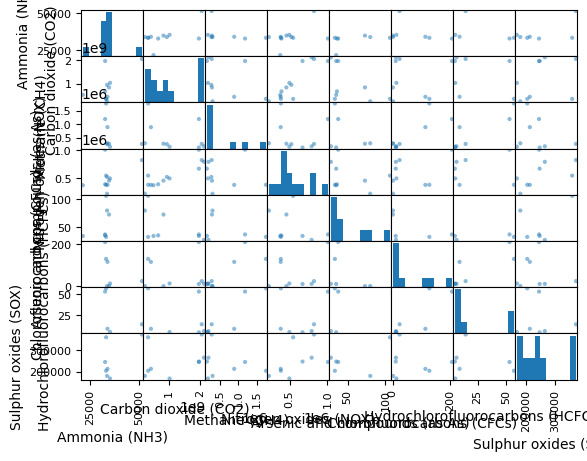

In [931]:
data_pol = data_pol.loc[:, ["Ammonia (NH3)", "Carbon dioxide (CO2)",
                             "Methane (CH4)", "Nitrogen oxides (NOX)", "Arsenic and compounds (as As)", "Chlorofluorocarbons (CFCs)", "Hydrochlorofluorocarbons (HCFCs)", "Sulphur oxides (SOX)"]]
scatter_matrix(data_pol)

Vou então preencher os NaN values por interpolação

In [932]:
data_pol = data_pol.loc[:, ["Ammonia (NH3)", "Carbon dioxide (CO2)",
                            "Methane (CH4)", "Nitrogen oxides (NOX)"]]

data_pol




pollutant,Ammonia (NH3),Carbon dioxide (CO2),Methane (CH4),Nitrogen oxides (NOX)
Year,,,,
2007,NaN,1.960000e+09,130000.0,6.705000e+05
2008,NaN,2.120000e+09,173500.0,7.915000e+05
2009,51400.0,2.050000e+09,262500.0,8.230000e+05
2010,35200.0,1.030000e+09,159000.0,4.965000e+05
2011,32700.0,1.960000e+09,1184000.0,1.007500e+06
2012,33900.0,4.380000e+08,884000.0,3.820000e+05
2013,33200.0,3.500000e+08,1760000.0,3.836667e+05
2014,33200.0,3.485000e+08,NaN,5.466667e+05
2015,33700.0,2.460000e+08,286000.0,2.250000e+05


In [933]:
data_traf.head()

,count_point_id,year,region_id,region_name,local_authority_id,local_authority_name,road_name,road_type,start_junction_road_name,end_junction_road_name,...,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
0,6750,2014,6,London,96,Islington,A201,Major,Swinton St,Pentonville Rd,...,787,1728,204,74,132,15,6,18,449,11916
1,8352,2014,6,London,104,Lewisham,A2,Major,A20,A20,...,430,1415,258,36,58,6,11,22,390,9426
2,6807,2014,6,London,178,Kingston upon Thames,A240,Major,A3210,A307,...,175,1589,251,35,13,2,4,19,325,12951
3,27765,2014,6,London,57,Barnet,A5109,Major,Barnet Lane,A1000/A109,...,302,1651,246,12,12,0,1,1,273,19276
4,8488,2014,6,London,104,Lewisham,A20,Major,A20 Amersham Rd,A2 Parkfield Rd,...,656,1617,286,83,27,5,8,7,415,12821


In [934]:
data_traf = data_traf[["year","local_authority_name","all_motor_vehicles"]]
data_traf = data_traf.groupby('year')['all_motor_vehicles'].sum().reset_index()

data_traf =data_traf.set_index(["year"])
data_traf.head()

,all_motor_vehicles
year,
2000,55572506
2001,55553417
2002,54356983
2003,55230556
2004,54561589


From the health index data-set will only be withdrawn, related to health, the value and the Indicator name(area which the index is being applied), sice the numerator and denominator are only used in order to obtain the variable "value".

In [935]:
data_health["Indicator name"].unique()

array(['Physical activity', 'Air pollution', 'Alcohol misuse',
       'Mortality from all causes', 'Avoidable mortality',
       'Cancer screening attendance', 'Cancer', 'Child poverty',
       'Drug misuse', 'Low-level crime', 'Personal crime',
       'Cardiovascular conditions', 'Dementia', 'Diabetes', 'Disability',
       'Distance to GP services', 'Distance to pharmacies',
       'Distance to sports or leisure facilities', 'Healthy eating',
       'Noise complaints', 'Early years development', 'Frailty',
       'Patients offered acceptable GP practice appointments',
       'High blood pressure', 'Household overcrowding',
       'Young people in education, employment and apprenticeships',
       'Sedentary behaviour', 'Infant mortality', 'Internet access',
       'Kidney and liver disease', 'Pupil attainment', 'Life expectancy',
       'Low birth weight', 'Mental health conditions',
       'Musculoskeletal conditions', 'Overweight and obesity in adults',
       'Overweight and obesi

In [936]:
data_health = data_health[["Area name","Value","Indicator name","Year"]].copy()
data_health['Value'] = data_health['Value'].str.replace(',', '.')
data_health["Value"] = data_health["Value"].astype(float)
data_health = data_health.groupby(["Year", "Indicator name"])["Value"].mean().reset_index().rename(columns={"Value":"Value"})
data_health = data_health.pivot(index='Year', columns='Indicator name', values='Value')
data_health= data_health.loc[:,["Air pollution", "Cancer", "Respiratory conditions"]]
data_health


Indicator name,Air pollution,Cancer,Respiratory conditions
Year,,,
2015,10.435721,3.222155,10.976621
2016,11.451568,3.222155,10.976621
2017,11.480882,3.222155,10.976621
2018,11.457786,3.222155,10.976621
2019,11.196704,3.412539,11.165615
2020,8.854768,3.384097,11.290680
2021,8.221743,3.088371,11.663465


MEDIA DOS MESES

In [937]:
data_air["Month"] = pd.to_datetime(data_air["Month"], format='%b-%y').dt.year
data_air.rename(columns={"Month":"Year"}, inplace=True)
data_air = data_air.set_index("Year")
data_air = data_air.groupby("Year").mean()
data_air


,NO2,PM10
Year,,
2008,57.016667,26.391667
2009,58.333333,25.808333
2010,58.633333,25.433333
2011,55.866667,27.641667
2012,60.069231,26.669231
2013,58.218182,28.263636
2014,56.675000,25.425000
2015,54.466667,23.725000
2016,56.375000,23.208333


Verify NaN values

In [938]:
health_NaN = data_health.isna().any()
health_NaN

Indicator name
Air pollution             False
Cancer                    False
Respiratory conditions    False
dtype: bool

In [939]:
air_NaN = data_air.isna().any()
air_NaN

NO2     False
PM10    False
dtype: bool

In [940]:
pol_NaN = data_pol.isna().any()
pol_NaN

pollutant
Ammonia (NH3)             True
Carbon dioxide (CO2)     False
Methane (CH4)             True
Nitrogen oxides (NOX)    False
dtype: bool

In [941]:
traf_NaN = data_traf.isna().any()
traf_NaN

all_motor_vehicles    False
dtype: bool

NORMALIZE DATA


In [942]:
scaler = MinMaxScaler()
data_air = scaler.fit_transform(data_air)
data_health = scaler.fit_transform(data_health)
data_pol = scaler.fit_transform(data_pol)
data_traf = scaler.fit_transform(data_traf)

<Axes: ylabel='Count'>

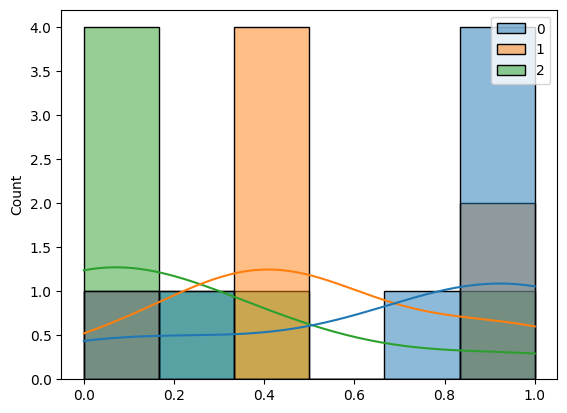

In [943]:
sns.histplot(data_health, kde=True)

Plot some data


<Axes: >

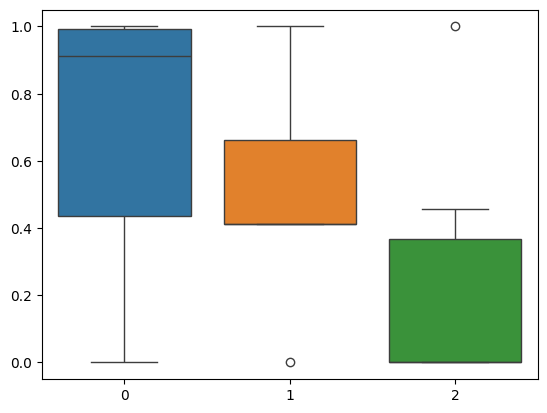

In [944]:
sns.boxplot(data_health)

<Axes: >

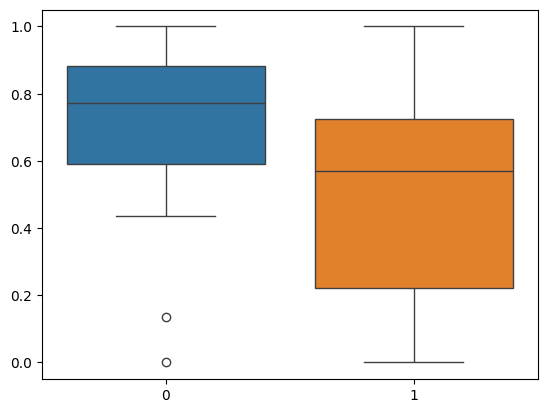

In [945]:
sns.boxplot(data_air)

<Axes: >

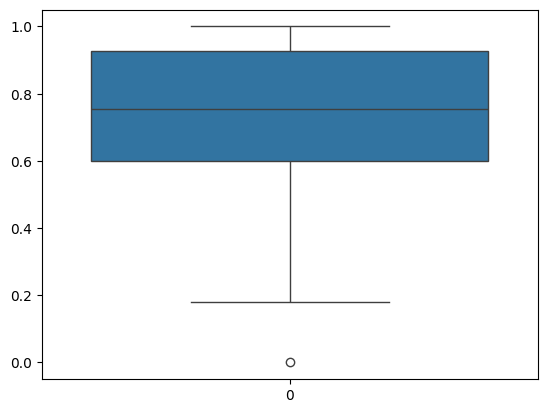

In [946]:
sns.boxplot(data_traf)

<Axes: >

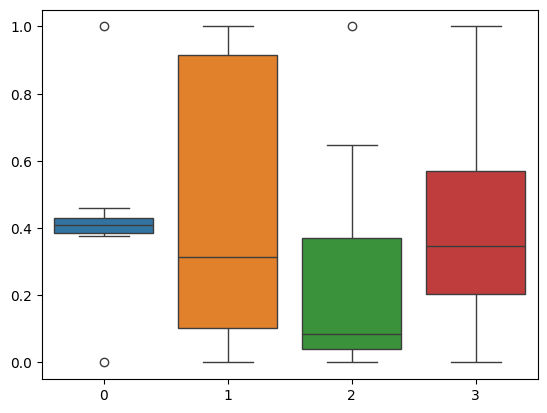

In [947]:
sns.boxplot(data_pol)

In [948]:
#code that is not used anymore
"""
def filterLocations(center, uk_data, radius_km):
    filtered_locations = pd.DataFrame()
    for a,k in uk_data.iterrows():
        loc = (k["Latitude"],k["Longitude"])
        distance = geodesic(center, loc).kilometers
        if distance <= radius_km:
            filtered_locations = pd.concat([filtered_locations, k.to_frame().T], ignore_index=True)
    return filtered_locations
"""


'\ndef filterLocations(center, uk_data, radius_km):\n    filtered_locations = pd.DataFrame()\n    for a,k in uk_data.iterrows():\n        loc = (k["Latitude"],k["Longitude"])\n        distance = geodesic(center, loc).kilometers\n        if distance <= radius_km:\n            filtered_locations = pd.concat([filtered_locations, k.to_frame().T], ignore_index=True)\n    return filtered_locations\n'

In [949]:
#code that is not used anymore
"""
#coordinates of the center of london
lat_lon_london = (51.509865, -0.118092)
#cities of UK
uk_data = data_pol[data_pol["countryName"]== "United Kingdom"]
#take only the cities within a radius of 50 km
data_pol= filterLocations(lat_lon_london,uk_data,50)
data_pol
"""


'\n#coordinates of the center of london\nlat_lon_london = (51.509865, -0.118092)\n#cities of UK\nuk_data = data_pol[data_pol["countryName"]== "United Kingdom"]\n#take only the cities within a radius of 50 km\ndata_pol= filterLocations(lat_lon_london,uk_data,50)\ndata_pol\n'